### Preprocessing: Increasing the number of bins from Opt 1

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], 1)

In [3]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
for col in application_df:
    print(application_df[col].unique())

['T10' 'T3' 'T5' 'T7' 'T4' 'T6' 'T2' 'T9' 'T19' 'T8' 'T13' 'T12' 'T29'
 'T25' 'T14' 'T17' 'T15']
['Independent' 'CompanySponsored' 'Family/Parent' 'National' 'Regional'
 'Other']
['C1000' 'C2000' 'C3000' 'C1200' 'C2700' 'C7000' 'C7200' 'C1700' 'C4000'
 'C7100' 'C2800' 'C6000' 'C2100' 'C1238' 'C5000' 'C7120' 'C1800' 'C4100'
 'C1400' 'C1270' 'C2300' 'C8200' 'C1500' 'C7210' 'C1300' 'C1230' 'C1280'
 'C1240' 'C2710' 'C2561' 'C1250' 'C8000' 'C1245' 'C1260' 'C1235' 'C1720'
 'C1257' 'C4500' 'C2400' 'C8210' 'C1600' 'C1278' 'C1237' 'C4120' 'C2170'
 'C1728' 'C1732' 'C2380' 'C1283' 'C1570' 'C2500' 'C1267' 'C3700' 'C1580'
 'C2570' 'C1256' 'C1236' 'C1234' 'C1246' 'C2190' 'C4200' 'C0' 'C3200'
 'C5200' 'C1370' 'C2600' 'C1248' 'C6100' 'C1820' 'C1900' 'C2150']
['ProductDev' 'Preservation' 'Heathcare' 'CommunityServ' 'Other']
['Association' 'Co-operative' 'Trust' 'Corporation']
[1 0]
['0' '1-9999' '10000-24999' '100000-499999' '10M-50M' '25000-99999' '50M+'
 '1M-5M' '5M-10M']
['N' 'Y']
[    5000   108590

In [5]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

### Removing Noisy Variables

In [6]:
application_df = application_df.drop(["SPECIAL_CONSIDERATIONS", "STATUS"], 1)

In [7]:
# Determine the number of unique values in each column.
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
USE_CASE             5
ORGANIZATION         4
INCOME_AMT           9
dtype: int64

### Increasing the number of bins to take into account rare occurences

In [8]:
# Look at APPLICATION_TYPE value counts for binning
Application_type_counts = application_df.APPLICATION_TYPE.value_counts()
Application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

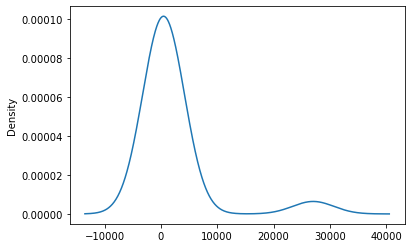

In [9]:
# Visualize the value counts of APPLICATION_TYPE
Application_type_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ...?
replace_application = list(Application_type_counts[Application_type_counts < 50].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: APPLICATION_TYPE, dtype: int64

In [11]:
#Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2600        1
C4120        1
C1570        1
C1580        1
C4500        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(classification_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C4100        6
C1720        6
C2400        6
C1600        5
C1257        5
C1260        3
C2710        3
C0           3
C1267        2
C3200        2
C1246        2
C1234        2
C1256        2
C1900        1
C1820        1
C1245        1
C2190        1
C2170        1
C1248        1
C2380        1
C2570        1
C8210        1
C2561        1
C4200        1
C2150        1
C5200        1
C3700        1
C1283        1
C1732        1
C1236        1
C2500        1
C1370        1
C6100        1
C1728        1
C2600     

<AxesSubplot:ylabel='Density'>

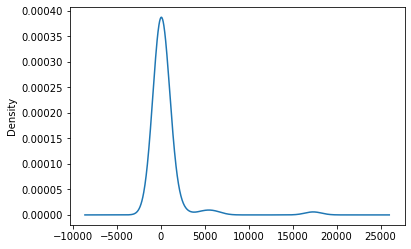

In [13]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [14]:
#Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 100].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [15]:
# Look at Use cases value counts for binning
use_case_counts = application_df.USE_CASE.value_counts()
use_case_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

<AxesSubplot:ylabel='Density'>

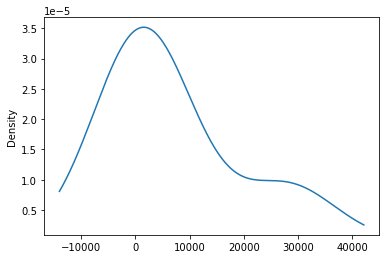

In [16]:
# Visualize the value counts of Use cases
use_case_counts.plot.density()

In [17]:
# Determine which values to replace if counts are less than ..?
replace_use_cases= list(use_case_counts[use_case_counts < 300].index)

# Replace in dataframe
for cls in replace_use_cases:
    application_df.USE_CASE = application_df.USE_CASE.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.USE_CASE.value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Other              149
Name: USE_CASE, dtype: int64

In [18]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE    11
AFFILIATION          6
CLASSIFICATION      12
USE_CASE             4
ORGANIZATION         4
INCOME_AMT           9
dtype: int64

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

In [20]:
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
application_df.columns

Index(['ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T13', 'APPLICATION_TYPE_T19',
       'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5',
       'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'APPLICATION_TYPE_T9', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C1270',
       'CLASSIFICATION_C1700', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100',
       'CLASSIFICATION_C2700', 'CLASSIFICATION_C3000', 'CLASSIFICATION_C4000',
       'CLASSIFICATION_C5000', 'CLASSIFICATION_C7000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Other', 'USE_CASE_Preservation',
       'USE_CASE_ProductDev', 'ORGANIZATION_Association',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_Corpora

In [23]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Optimization Attempt 3: Increasing neurons and number of hidden layers to 4 and using relu 

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layers1 = 50
hidden_nodes_layers2 = 24
hidden_nodes_layers3 = 12
hidden_nodes_layers4 = 8

nn = tf.keras.models.Sequential()

#First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layers1, input_dim=number_input_features, activation="relu"))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers2, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers2, activation="relu"))

#Output later
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                2400      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1224      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 4,849
Trainable params: 4,849
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimized/",exist_ok=True)
checkpoint_path = "checkpoints_optimized/weights.{epoch:02d}.hdf5"

In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
 72/804 [=>............................] - ETA: 0s - loss: 0.6768 - accuracy: 0.5670  
Epoch 00001: saving model to checkpoints_optimized\weights.01.hdf5
188/804 [======>.......................] - ETA: 0s - loss: 0.6418 - accuracy: 0.6327
Epoch 00001: saving model to checkpoints_optimized\weights.01.hdf5
241/804 [=======>......................] - ETA: 0s - loss: 0.6320 - accuracy: 0.6471
Epoch 00001: saving model to checkpoints_optimized\weights.01.hdf5
364/804 [============>.................] - ETA: 0s - loss: 0.6181 - accuracy: 0.6664
Epoch 00001: saving model to checkpoints_optimized\weights.01.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.6107 - accuracy: 0.6759
Epoch 00001: saving model to checkpoints_optimized\weights.01.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.6048 - accuracy: 0.6826
Epoch 00001: saving model to checkpoints_optimized\weights.01.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6027 - accurac

234/804 [=======>......................] - ETA: 0s - loss: 0.5453 - accuracy: 0.7349
Epoch 00007: saving model to checkpoints_optimized\weights.07.hdf5
344/804 [===========>..................] - ETA: 0s - loss: 0.5451 - accuracy: 0.7341
Epoch 00007: saving model to checkpoints_optimized\weights.07.hdf5
462/804 [================>.............] - ETA: 0s - loss: 0.5455 - accuracy: 0.7333
Epoch 00007: saving model to checkpoints_optimized\weights.07.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 0.5458 - accuracy: 0.7330
Epoch 00007: saving model to checkpoints_optimized\weights.07.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5467 - accuracy: 0.7321
Epoch 00007: saving model to checkpoints_optimized\weights.07.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5470 - accuracy: 0.7318
Epoch 00007: saving model to checkpoints_optimized\weights.07.hdf5
804/804 [==============================] - 1s 892us/step - loss: 0.5471 - accuracy: 0.73

452/804 [===============>..............] - ETA: 0s - loss: 0.5366 - accuracy: 0.7423
Epoch 00013: saving model to checkpoints_optimized\weights.13.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5375 - accuracy: 0.7413
Epoch 00013: saving model to checkpoints_optimized\weights.13.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5388 - accuracy: 0.7398
Epoch 00013: saving model to checkpoints_optimized\weights.13.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5395 - accuracy: 0.7389
Epoch 00013: saving model to checkpoints_optimized\weights.13.hdf5
804/804 [==============================] - 1s 855us/step - loss: 0.5399 - accuracy: 0.7384
Epoch 14/50
  1/804 [..............................] - ETA: 0s - loss: 0.5178 - accuracy: 0.8125
Epoch 00014: saving model to checkpoints_optimized\weights.14.hdf5
136/804 [====>.........................] - ETA: 0s - loss: 0.5472 - accuracy: 0.7340
Epoch 00014: saving model to checkpoints_optimized\w

602/804 [=====================>........] - ETA: 0s - loss: 0.5405 - accuracy: 0.7345
Epoch 00019: saving model to checkpoints_optimized\weights.19.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.5405 - accuracy: 0.7346
Epoch 00019: saving model to checkpoints_optimized\weights.19.hdf5
804/804 [==============================] - 1s 820us/step - loss: 0.5409 - accuracy: 0.7345
Epoch 20/50
  1/804 [..............................] - ETA: 0s - loss: 0.5245 - accuracy: 0.7500
Epoch 00020: saving model to checkpoints_optimized\weights.20.hdf5
 63/804 [=>............................] - ETA: 0s - loss: 0.5357 - accuracy: 0.7401
Epoch 00020: saving model to checkpoints_optimized\weights.20.hdf5
200/804 [======>.......................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7396
Epoch 00020: saving model to checkpoints_optimized\weights.20.hdf5
252/804 [========>.....................] - ETA: 0s - loss: 0.5379 - accuracy: 0.7397
Epoch 00020: saving model to checkpoints_optimized\w

783/804 [============================>.] - ETA: 0s - loss: 0.5389 - accuracy: 0.7380
Epoch 00025: saving model to checkpoints_optimized\weights.25.hdf5
804/804 [==============================] - 1s 891us/step - loss: 0.5390 - accuracy: 0.7379
Epoch 26/50
 78/804 [=>............................] - ETA: 0s - loss: 0.5146 - accuracy: 0.7541
Epoch 00026: saving model to checkpoints_optimized\weights.26.hdf5
143/804 [====>.........................] - ETA: 0s - loss: 0.5254 - accuracy: 0.7438
Epoch 00026: saving model to checkpoints_optimized\weights.26.hdf5
272/804 [=========>....................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7389
Epoch 00026: saving model to checkpoints_optimized\weights.26.hdf5
394/804 [=============>................] - ETA: 0s - loss: 0.5338 - accuracy: 0.7383
Epoch 00026: saving model to checkpoints_optimized\weights.26.hdf5
447/804 [===============>..............] - ETA: 0s - loss: 0.5343 - accuracy: 0.7381
Epoch 00026: saving model to checkpoints_optimized\w

 76/804 [=>............................] - ETA: 0s - loss: 0.5546 - accuracy: 0.7193
Epoch 00032: saving model to checkpoints_optimized\weights.32.hdf5
137/804 [====>.........................] - ETA: 0s - loss: 0.5478 - accuracy: 0.7271
Epoch 00032: saving model to checkpoints_optimized\weights.32.hdf5
260/804 [========>.....................] - ETA: 0s - loss: 0.5440 - accuracy: 0.7323
Epoch 00032: saving model to checkpoints_optimized\weights.32.hdf5
312/804 [==========>...................] - ETA: 0s - loss: 0.5434 - accuracy: 0.7331
Epoch 00032: saving model to checkpoints_optimized\weights.32.hdf5
431/804 [===============>..............] - ETA: 0s - loss: 0.5425 - accuracy: 0.7344
Epoch 00032: saving model to checkpoints_optimized\weights.32.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5420 - accuracy: 0.7351
Epoch 00032: saving model to checkpoints_optimized\weights.32.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5416 - accuracy: 0.7353
Epo

242/804 [========>.....................] - ETA: 0s - loss: 0.5409 - accuracy: 0.7370
Epoch 00038: saving model to checkpoints_optimized\weights.38.hdf5
290/804 [=========>....................] - ETA: 0s - loss: 0.5402 - accuracy: 0.7368
Epoch 00038: saving model to checkpoints_optimized\weights.38.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5390 - accuracy: 0.7364
Epoch 00038: saving model to checkpoints_optimized\weights.38.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5389 - accuracy: 0.7360
Epoch 00038: saving model to checkpoints_optimized\weights.38.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5389 - accuracy: 0.7359
Epoch 00038: saving model to checkpoints_optimized\weights.38.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5390 - accuracy: 0.7356
Epoch 00038: saving model to checkpoints_optimized\weights.38.hdf5
804/804 [==============================] - 1s 869us/step - loss: 0.5390 - accuracy: 0.73

356/804 [============>.................] - ETA: 0s - loss: 0.5393 - accuracy: 0.7376
Epoch 00044: saving model to checkpoints_optimized\weights.44.hdf5
504/804 [=================>............] - ETA: 0s - loss: 0.5382 - accuracy: 0.7382
Epoch 00044: saving model to checkpoints_optimized\weights.44.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5381 - accuracy: 0.7382
Epoch 00044: saving model to checkpoints_optimized\weights.44.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5380 - accuracy: 0.7380
Epoch 00044: saving model to checkpoints_optimized\weights.44.hdf5
804/804 [==============================] - 1s 867us/step - loss: 0.5380 - accuracy: 0.7379
Epoch 45/50
  1/804 [..............................] - ETA: 0s - loss: 0.5266 - accuracy: 0.6875
Epoch 00045: saving model to checkpoints_optimized\weights.45.hdf5
 62/804 [=>............................] - ETA: 0s - loss: 0.5584 - accuracy: 0.7184
Epoch 00045: saving model to checkpoints_optimized\w

532/804 [==================>...........] - ETA: 0s - loss: 0.5349 - accuracy: 0.7402
Epoch 00050: saving model to checkpoints_optimized\weights.50.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7392
Epoch 00050: saving model to checkpoints_optimized\weights.50.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5359 - accuracy: 0.7390
Epoch 00050: saving model to checkpoints_optimized\weights.50.hdf5
804/804 [==============================] - 1s 848us/step - loss: 0.5360 - accuracy: 0.7388
268/268 - 0s - loss: 0.5445 - accuracy: 0.7367
Loss: 0.5444745421409607, Accuracy: 0.7366763949394226


<AxesSubplot:>

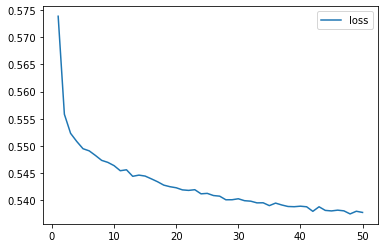

In [28]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

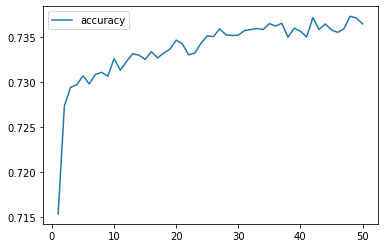

In [29]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [32]:
nn.save('AlphabetSoupCharity_Optimization.h5')

In [33]:
# Import the model to a new object 
nn_imported = tf.keras.models.load_model('AlphabetSoupCharity_Optimization.h5')

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5445 - accuracy: 0.7367
Loss: 0.5444745421409607, Accuracy: 0.7366763949394226
